In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import nltk

In [8]:
nltk.download('punkt')
df = pd.read_csv('dados.csv')
df.head()
sent_tokenize(df['descricao'].iloc[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gabriel_Germano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Que a diretoria da CENAPET, em conjunto com a FORGRAD e a ANDIFES, pressionem o MEC (FNDE) para que o custeio seja destinado aos grupos PET, no seu valor INTEGRAL, no início do ano fiscal, no máximo até 01/março para seu gasto até 15/outubro, com prestação de contas até 30/outubro do mesmo ano fiscal vigente.']

In [101]:
# create a new dataframe with the id and the tokenized description
new_df = pd.DataFrame()
new_df['id'] = range(1, len(df))
new_df['evento'] = df['evento']
new_df['tokenized'] = df['descricao'].apply(lambda x: word_tokenize(x))

new_df.head()

,id,evento,tokenized
0,1,GDT 1 - ENAPET 2018,"[Que, a, diretoria, da, CENAPET, ,, em, conjun..."
1,2,GDT 1 - ENAPET 2018,"[Que, os, titulares, e, suplentes, do, Conselh..."
2,3,GDT 1 - ENAPET 2018,"[Que, a, diretoria, da, CENAPET, intervenha, j..."
3,4,GDT 1 - ENAPET 2018,"[Que, a, Diretoria, da, CENAPET, pressione, o,..."
4,5,GDT 1 - ENAPET 2018,"[Que, a, Diretoria, da, CENAPET, proponha, ao,..."


# Working with stopwords and tokenized words

In [102]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')
# Remove pontuaction
new_df['tokenized'] = new_df['tokenized'].apply(lambda x: [word for word in x if word.isalnum()])
# Remove stopwords
new_df['no_stopwords'] = new_df['tokenized'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
new_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gabriel_Germano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,evento,tokenized,no_stopwords
0,1,GDT 1 - ENAPET 2018,"[Que, a, diretoria, da, CENAPET, em, conjunto,...","[diretoria, CENAPET, conjunto, FORGRAD, ANDIFE..."
1,2,GDT 1 - ENAPET 2018,"[Que, os, titulares, e, suplentes, do, Conselh...","[titulares, suplentes, Conselho, Diretoria, CE..."
2,3,GDT 1 - ENAPET 2018,"[Que, a, diretoria, da, CENAPET, intervenha, j...","[diretoria, CENAPET, intervenha, junto, reuniõ..."
3,4,GDT 1 - ENAPET 2018,"[Que, a, Diretoria, da, CENAPET, pressione, o,...","[Diretoria, CENAPET, pressione, MEC, sentido, ..."
4,5,GDT 1 - ENAPET 2018,"[Que, a, Diretoria, da, CENAPET, proponha, ao,...","[Diretoria, CENAPET, proponha, MEC, acesso, Si..."


## Using linear_kernel to compare the database

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

In [108]:
results = new_df['no_stopwords'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(results)
similarities = set()

for i in range(len(new_df)):
    # Calcular a similaridade do cosseno na base de dados
    cosine_similarities = linear_kernel(tfidf_matrix[i:i+1], tfidf_matrix).flatten()
    # Zerar a similaridade do cosseno para o próprio index
    cosine_similarities[i] = 0
    # Obter o índice do maior valor
    most_similar = np.argmax(cosine_similarities)
    
    most_similar_value = cosine_similarities[most_similar]
    
    most_similar_text = new_df['no_stopwords'].iloc[most_similar]

    similarities.add(most_similar_value)
    print(f"Texto: {new_df['no_stopwords'].iloc[i]}, evento: {new_df['evento'].iloc[i]}")
    print(f"Texto mais semelhante: {most_similar_text}, evento: {new_df['evento'].iloc[most_similar]}")
    print(f"Similaridade: {most_similar_value}")
    print("-----")

Texto: ['diretoria', 'CENAPET', 'conjunto', 'FORGRAD', 'ANDIFES', 'pressionem', 'MEC', 'FNDE', 'custeio', 'destinado', 'grupos', 'PET', 'valor', 'INTEGRAL', 'início', 'ano', 'fiscal', 'máximo', 'gasto', 'prestação', 'contas', 'ano', 'fiscal', 'vigente'], evento: GDT 1 - ENAPET 2018
Texto mais semelhante: ['Diretoria', 'CENAPET', 'pressione', 'MEC', 'sentido', 'pagas', 'duas', 'parcelas', 'custeio', 'primeira', 'parcela', 'paga', 'início', 'ano'], evento: GDT 1 - ENAPET 2018
Similaridade: 0.18334745608261052
-----
Texto: ['titulares', 'suplentes', 'Conselho', 'Diretoria', 'CENAPET', 'convidados', 'comparecer', 'eventos', 'regionais', 'respectivas', 'regiões', 'eventos', 'nacionais', 'durante', 'períodos', 'mandato', 'caso', 'impossibilidade', 'providenciar', 'alguma', 'ação', 'informe', 'atribuições', 'ações', 'realizados', 'data', 'evento'], evento: GDT 1 - ENAPET 2018
Texto mais semelhante: ['CLAA', 'respectivas', 'IES', 'fiscalizem', 'partir', '2019', 'cada', 'ano', 'meio', 'listas',

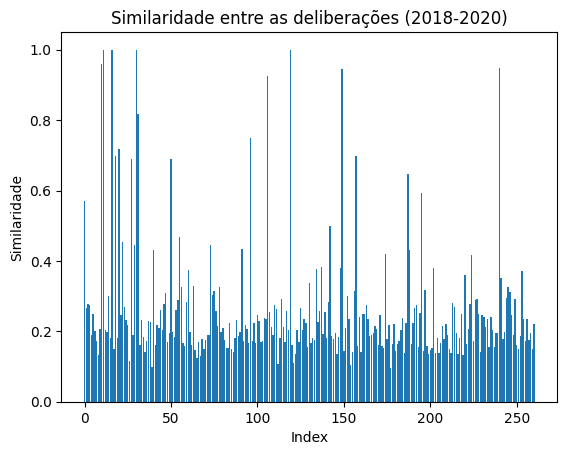

In [110]:
import matplotlib.pyplot as plt
plt.bar(range(len(similarities)), similarities)
plt.xlabel('Index')
plt.ylabel('Similaridade')
plt.title('Similaridade entre as deliberações (2018-2020)')
plt.show()

# Working with lemmatization

In [120]:
import spacy
!python -m spacy download pt_core_news_sm

     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     --------------------------------------- 0.0/13.0 MB 682.7 kB/s eta 0:00:19
     ---------------------------------------- 0.1/13.0 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.2/13.0 MB 1.8 MB/s eta 0:00:08
     - -------------------------------------- 0.3/13.0 MB 2.0 MB/s eta 0:00:07
     - -------------------------------------- 0.6/13.0 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/13.0 MB 3.4 MB/s eta 0:00:04
     --- ------------------------------------ 1.3/13.0 MB 4.3 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/13.0 MB 5.6 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/13.0 MB 6.7 MB/s eta 0:00:02
     ------------ --------------------------- 4.2/13.0 MB 9.2 MB/s eta 0:00:01
     ----------------- ---------------------- 5.7/13.0 MB 11.3 MB/s eta 0:00:01
     ---------------------- ----------------- 7.2/13.0 MB

In [125]:
nlp = spacy.load('pt_core_news_sm')
print(nlp.component_names)

['tok2vec', 'morphologizer', 'parser', 'lemmatizer', 'senter', 'attribute_ruler', 'ner']


In [123]:
lem_df = pd.DataFrame()
lem_df['id'] = range(1, len(df))
lem_df['evento'] = df['evento']
lem_df['lemmatized'] = new_df['no_stopwords'].apply(lambda x: [token.lemma_ for token in nlp(' '.join(x))])
lem_df.head()

,id,evento,lemmatized
0,1,GDT 1 - ENAPET 2018,"[diretoria, CENAPET, conjunto, FORGRAD, ANDIFE..."
1,2,GDT 1 - ENAPET 2018,"[titular, suplente, Conselho, Diretoria, CENAP..."
2,3,GDT 1 - ENAPET 2018,"[diretoria, CENAPET, intervir, junto, reunião,..."
3,4,GDT 1 - ENAPET 2018,"[Diretoria, CENAPET, pressione, MEC, senter, p..."
4,5,GDT 1 - ENAPET 2018,"[Diretoria, CENAPET, propor, MEC, acesso, Sist..."


## Using linear_kernel to verify similarities

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

In [127]:
results = lem_df['lemmatized'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(results)
similarities = set()

for i in range(len(new_df)):
    # Calcular a similaridade do cosseno na base de dados
    cosine_similarities = linear_kernel(tfidf_matrix[i:i+1], tfidf_matrix).flatten()
    # Zerar a similaridade do cosseno para o próprio index
    cosine_similarities[i] = 0
    # Obter o índice do maior valor
    most_similar = np.argmax(cosine_similarities)
    
    most_similar_value = cosine_similarities[most_similar]
    
    most_similar_text = lem_df['lemmatized'].iloc[most_similar]

    similarities.add(most_similar_value)
    print(f"Texto: {lem_df['lemmatized'].iloc[i]}, evento: {lem_df['evento'].iloc[i]}")
    print(f"Texto mais semelhante: {most_similar_text}, evento: {lem_df['evento'].iloc[most_similar]}")
    print(f"Similaridade: {most_similar_value}")
    print("-----")

Texto: ['diretoria', 'CENAPET', 'conjunto', 'FORGRAD', 'ANDIFES', 'pressionem', 'MEC', 'FNDE', 'custeio', 'destinar', 'grupo', 'PET', 'valor', 'INTEGRAL', 'início', 'ano', 'fiscal', 'grande', 'gastar', 'prestação', 'contas', 'ano', 'fiscal', 'vigente'], evento: GDT 1 - ENAPET 2018
Texto mais semelhante: ['partir', 'XXV', 'ENAPET', 'CENAPET', 'incluar', 'Diretrizes', 'Organizações', 'evento', 'orientação', 'Comissões', 'Organizadoras', 'evento', 'regional', 'Nacional', 'PET', 'compiler', 'encaminhamento', 'sugestão', 'ATA', 'Oficial', 'acordo', 'instância', 'dever', 'destinado', 'destinar', 'Diretoria', 'CENAPET', 'destinar', 'conselho', 'CENAPET', 'destinar', 'Mobiliza', 'PET', 'destinar', 'CLAA', 'destinar', 'Grupos', 'PETs', 'outro'], evento: GDT 1 - Construção de Eventos PET - ENAPET 2020
Similaridade: 0.17459825123618944
-----
Texto: ['titular', 'suplente', 'Conselho', 'Diretoria', 'CENAPET', 'convidar', 'comparecer', 'evento', 'regional', 'respectivo', 'região', 'evento', 'naciona

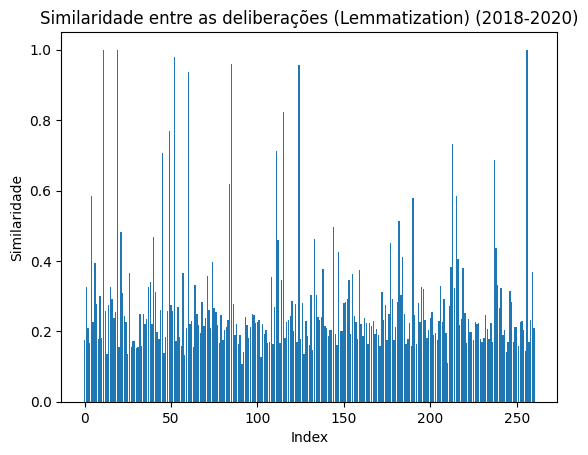

In [128]:
import matplotlib.pyplot as plt
plt.bar(range(len(similarities)), similarities)
plt.xlabel('Index')
plt.ylabel('Similaridade')
plt.title('Similaridade entre as deliberações (Lemmatization) (2018-2020)')
plt.show()

# Working with stemmatization

In [118]:
stem_df = pd.DataFrame()
stem_df['id'] = range(1, len(df))
stem_df['evento'] = df['evento']
stem_df['stemmed'] = new_df['no_stopwords'].apply(lambda x: [nltk.stem.RSLPStemmer().stem(word) for word in x])
stem_df.head()

,id,evento,stemmed
0,1,GDT 1 - ENAPET 2018,"[diret, cenapet, conjunt, forgrad, andif, pres..."
1,2,GDT 1 - ENAPET 2018,"[titul, supl, conselh, diret, cenapet, convid,..."
2,3,GDT 1 - ENAPET 2018,"[diret, cenapet, intervenh, junt, reun, subseq..."
3,4,GDT 1 - ENAPET 2018,"[diret, cenapet, pression, mec, sent, pag, dua..."
4,5,GDT 1 - ENAPET 2018,"[diret, cenapet, proponh, mec, acess, sistem, ..."


In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

In [130]:
results = stem_df['stemmed'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(results)
similarities = set()

for i in range(len(new_df)):
    # Calcular a similaridade do cosseno na base de dados
    cosine_similarities = linear_kernel(tfidf_matrix[i:i+1], tfidf_matrix).flatten()
    # Zerar a similaridade do cosseno para o próprio index
    cosine_similarities[i] = 0
    # Obter o índice do maior valor
    most_similar = np.argmax(cosine_similarities)
    
    most_similar_value = cosine_similarities[most_similar]
    
    most_similar_text = stem_df['stemmed'].iloc[most_similar]

    similarities.add(most_similar_value)
    print(f"Texto: {stem_df['stemmed'].iloc[i]}, evento: {stem_df['evento'].iloc[i]}")
    print(f"Texto mais semelhante: {most_similar_text}, evento: {stem_df['evento'].iloc[most_similar]}")
    print(f"Similaridade: {most_similar_value}")
    print("-----")

Texto: ['diret', 'cenapet', 'conjunt', 'forgrad', 'andif', 'pression', 'mec', 'fnd', 'custei', 'destin', 'grup', 'pet', 'val', 'integr', 'iníci', 'ano', 'fiscal', 'máx', 'gast', 'prest', 'cont', 'ano', 'fiscal', 'vigent'], evento: GDT 1 - ENAPET 2018
Texto mais semelhante: ['diret', 'cenapet', 'pression', 'mec', 'sent', 'pag', 'dua', 'parcel', 'custei', 'prim', 'parcel', 'pag', 'iníci', 'ano'], evento: GDT 1 - ENAPET 2018
Similaridade: 0.2385888999948123
-----
Texto: ['titul', 'supl', 'conselh', 'diret', 'cenapet', 'convid', 'comparec', 'event', 'region', 'respec', 'reg', 'event', 'nacion', 'dur', 'períod', 'mandat', 'cas', 'impossibil', 'providenci', 'algum', 'açã', 'inform', 'atribu', 'açõ', 'realiz', 'dat', 'event'], evento: GDT 1 - ENAPET 2018
Texto mais semelhante: ['encaminh', 'art', '25', 'ele', 'diret', 'hav', 'part', 'dat', 'fix', 'comiss', 'eleitor', 'divulg', 'chap', 'respec', 'program', 'tut', 'alun', 'eleit', 'vot', 'porém', 'eleit', 'titul', 'conselh', 'cad', 'encontr', '

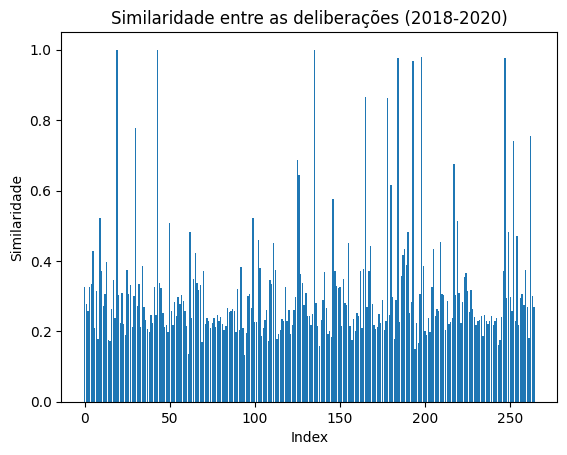

In [131]:
import matplotlib.pyplot as plt
plt.bar(range(len(similarities)), similarities)
plt.xlabel('Index')
plt.ylabel('Similaridade')
plt.title('Similaridade entre as deliberações (2018-2020)')
plt.show()

# Comparing the 3 tecniques

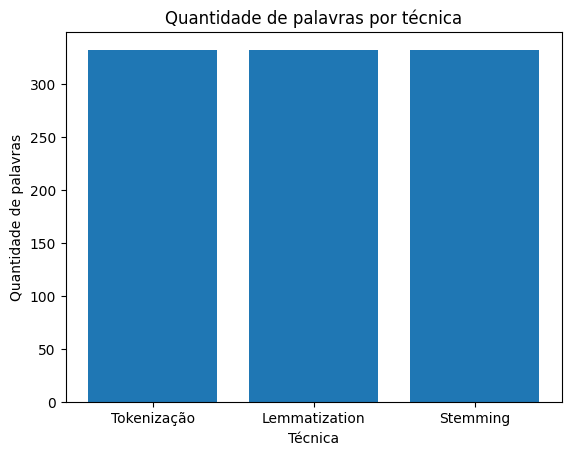

In [133]:
# Plotando o resultado das tecnicas usadas -> Tokenização, lemmatization e stemming
# Vamos usar os valores obtidos em cada técnica para comparar qual foi mais eficiente
import matplotlib.pyplot as plt

plt.bar(['Tokenização', 'Lemmatization', 'Stemming'], [new_df['no_stopwords'].apply(lambda x: ' '.join(x)).shape[0], lem_df['lemmatized'].apply(lambda x: ' '.join(x)).shape[0], stem_df['stemmed'].apply(lambda x: ' '.join(x)).shape[0]])
plt.xlabel('Técnica')
plt.ylabel('Quantidade de palavras')
plt.title('Quantidade de palavras por técnica')
plt.show()